# Supporter Data Analysis

This data includes all of the organizations supporters and brief demographic information on them. This information includes:

- primary_city: The city the supporter lives in | dtype: string
- zipcode: The zipcode the supportter lives in | dtype: string
- donor: whether or not the supporter has donated in the past | dtype: boolean
- age: the age of the supporter | dtype: integer
- marital_status: marital status of the supporter | dtype: boolean
- race: the race of the supporter | dtype: string
- partisanship_score: the party that the supporter likely identifies with | dtype: integer
    - 1 = Strong Republican
    - 2 = Likely Republican
    - 3 = Independent
    - 4 = Likely Democrat
    - 5 = Strong Democrat

The objective of this anaylsis is to better understand the demographics of our supporters to be used to better target supporters and donors in key areas. We will explore the following:
- Average age and partisanship scroes of supporters
- Marital status of supporters
- Supporter Locations
- Partisanship by age
- Supporter race
- Race & partisanship
- Donor profiles
- City & Partisanship

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

In [2]:
data = pd.read_csv('data/cleaned_supporter_data.csv')

In [3]:
data.head()

,Unnamed: 0,primary_city,zipcode,donor,age,marital_status,race,partisanship_score
0,0,Chesterfield,23832,False,51,True,Caucasian,5
1,1,Fredericksburg,22407,False,44,True,Caucasian,5
2,2,Clifton,20124,False,56,True,Caucasian,4
3,3,Lexington,24450,False,66,True,Caucasian,4
4,4,Lexington,24450,False,61,False,Caucasian,5


## 1. Exploring Mean of Supporter Partisanship Score & Age

In [4]:
data[['partisanship_score','age']].describe()

,partisanship_score,age
count,38058.000000,38058.000000
mean,3.967497,58.130853
std,1.440345,15.238170
min,1.000000,17.000000
25%,3.000000,47.000000
50%,5.000000,60.000000
75%,5.000000,69.000000
max,5.000000,103.000000


### We now know:
- the average age of our supporter is about 58 years old
- the average supporter has a partisanship_score of 3.97. This means it's most likely that our supporters are likely democrtas.

## 2. Exploring the Marital Status of Supporters

In [5]:
marriage = {'married':0, 'single':0}
for item in data['marital_status']:
    if item == True:
        marriage['married'] = marriage['married'] + 1
    elif item == False:
        marriage['single'] = marriage['single'] + 1
        
print(marriage)
   

{'married': 21293, 'single': 16765}


pyplot.bar(bar_positions, bar_heights, width)



Text(0.5,1,'Marital Status')

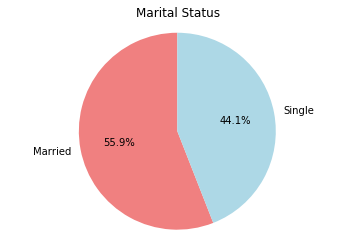

In [6]:
status = ['Married', 'Single']
heights = [21293, 16765]
position = arange(2) + 1
colors = ['lightcoral', 'lightblue']
labels = ['Married', 'Single']
fig, ax = plt.subplots()
ax = plt.pie(heights,autopct='%1.1f%%', labels = labels, shadow=False, startangle=90, colors = colors,)
plt.axis('equal')
plt.title("Marital Status")




### We now know:

- A majority of our supporters are married

## 3. Exploring Location of Supporters

In [7]:
cities = data['primary_city']
city_count = {}
for i in cities:
    if i in city_count:
        city_count[i] = city_count[i] + 1
    else:
        city_count[i] = city_count[i] = 1

top_cities = [k for k,v in city_count.items() if v >= 200]
# Used dict( to create a dictionary based off dictionary comprehension
top_cities_count = dict((k, v) for k, v in city_count.items() if v >= 200)

names_of_top_cities = list(top_cities_count.keys())
counts_of_top_cities = list(top_cities_count.values())

print(top_cities_count)



{'Fredericksburg': 729, 'Lexington': 209, 'Charlottesville': 3011, 'Alexandria': 2126, 'Richmond': 3341, 'Herndon': 390, 'Williamsburg': 853, 'Fairfax': 829, 'Falls Church': 994, 'Roanoke': 474, 'Reston': 732, 'Vienna': 556, 'North Chesterfield': 470, 'Virginia Beach': 1851, 'Blacksburg': 401, 'Midlothian': 490, 'Manassas': 355, 'Burke': 256, 'Glen Allen': 390, 'Henrico': 997, 'Sterling': 246, 'Springfield': 639, 'Arlington': 1835, 'Warrenton': 218, 'Norfolk': 950, 'Woodbridge': 424, 'Crozet': 268, 'Annandale': 398, 'McLean': 224, 'Mechanicsville': 301, 'Chesapeake': 310, 'Newport News': 472, 'Staunton': 464, 'Centreville': 282, 'Ashburn': 251, 'Lynchburg': 684, 'Leesburg': 256, 'Fairfax Station': 309, 'Palmyra': 476}


Text(0.5,1,'Supporter Count By City')

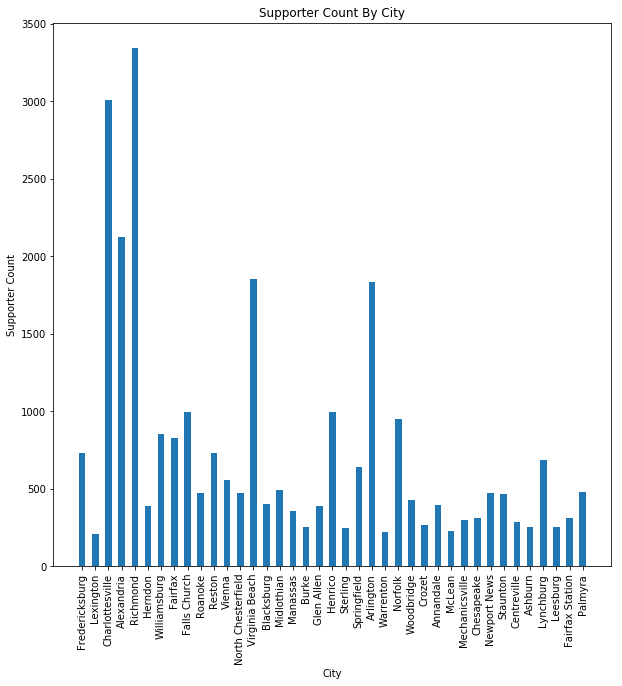

In [8]:
heights2 = counts_of_top_cities
labels2 = names_of_top_cities
position2 = arange(39) 
tick_positions2 = range(0,39)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.bar(position2, heights2, .5)
ax.set_xticks(tick_positions2)
ax.set_xticklabels(labels2, rotation = 90)
ax.set_xlabel('City')
ax.set_ylabel('Supporter Count')
ax.set_title('Supporter Count By City')

### We now know
- Majority of our supporters are concentrated between 15 cities in Virginia. 
    - Fredericksburg
    - Charlottesville
    - Alexandria
    - Richmond
    - Williamsburg
    - Fairfax
    - Falls Church
    - Reston
    - Vienna
    - Virginia Beach
    - Henrico
    - Springfield
    - Arlington
    - Norfolk
    - Lynchburg
    

## 4. Exploring Partisanship Score by Age

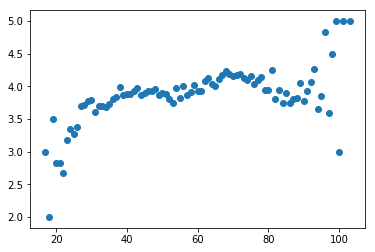

In [9]:
ages_sorted = data.sort_values(by='age')
ages_partisanship = ages_sorted.copy()
ages_partisanship = ages_partisanship[['age', 'partisanship_score']]
grouped = ages_partisanship.groupby('age', as_index=False)['partisanship_score'].mean()
fig = plt.figure()
ax = plt.scatter(grouped['age'], grouped['partisanship_score'])

### We now know:
- supporters partisanship_scores are about the same from the age range of ~30 - ~80
- younger (20-30) and older (80+) supporters are more likely to be more partisan leaning

## 5. Exploring Race by Supporter

Text(0.5,1,'Supporter Count by Race')

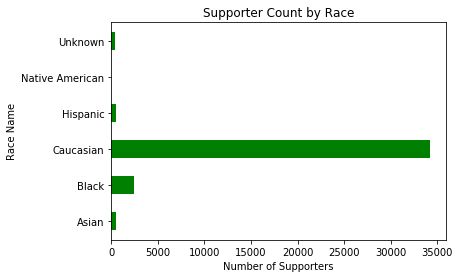

In [10]:
race_count = {}

for i in data['race']:
    if i in race_count:
        race_count[i] = race_count[i] + 1
    else:
        race_count[i] = race_count[i] = 1
        
races = list(race_count.keys())
race_counts = list(race_count.values())

fig = plt.figure()
ax = plt.barh(races,race_counts,.5, color = "green")
plt.ylabel("Race Name")
plt.xlabel("Number of Supporters")
plt.title("Supporter Count by Race")

### We now know
- Our organziation's supporters are disportionally white, with black being the second most common race


## 6. Exploring Partisanship by Race

In [11]:
race_partisanship = data[['race', 'partisanship_score']]
grouped_races = race_partisanship.groupby('race', as_index=False)['partisanship_score'].mean()
print(grouped_races)


              race  partisanship_score
0            Asian            4.000000
1            Black            4.537985
2        Caucasian            3.920879
3         Hispanic            4.203455
4  Native American            3.666667
5          Unknown            4.148936


### We now know
- race is not a huge contributer to partisanship_score. Every race falls within one std of the mean score.

## 7. Exploring Donors by Partisanship and Age

In [12]:
donor_partisanship = data[['donor', 'partisanship_score']]
donor_partisanship = donor_partisanship.groupby('donor', as_index=False)['partisanship_score'].mean()
print(donor_partisanship)

   donor  partisanship_score
0  False            3.932516
1   True            4.387825


In [13]:
donor_age = data[['donor', 'age']]
donor_age = donor_age.groupby('donor', as_index=False)['age'].mean()
print(donor_age)

   donor        age
0  False  57.786902
1   True  62.263680


### We now know:
- The average donor is more left leaning than our average supporter.
- The average voter is 4 years older than the average supporter.

## 8. Exploring Partianship by City
Work in Progress

In [14]:
city_partisanship = data[['primary_city', 'partisanship_score']]
city_partisanship = city_partisanship.groupby('primary_city', as_index=False)['partisanship_score'].mean()
print(city_partisanship)

           primary_city  partisanship_score
0              Abingdon            4.206897
1               Accomac            4.200000
2              Achilles            5.000000
3                 Afton            4.587786
4               Alberta            2.333333
5                 Aldie            3.348837
6            Alexandria            4.478363
7             Altavista            2.714286
8                 Alton            5.000000
9    Amelia Court House            2.545455
10              Amherst            3.494624
11           Amissville            4.294118
12            Annandale            4.396985
13                  Apo            3.000000
14           Appalachia            4.000000
15           Appomattox            3.300000
16               Ararat            3.000000
17                  Ark            5.000000
18            Arlington            4.645777
19                Aroda            2.250000
20            Arrington            3.833333
21              Arvonia         

In [15]:
# NEED TO FIGURE OUT HOW TO ONLY FIND THE MEAN PARTISANSHIP SCORE FOR THE CITIES INSIDE THE DICTIONARY 'top_cities_count'
